# Threshold

In [ ]:
import zipfile

#extract the dataset from the zip file
with zipfile.ZipFile('/content/Threshold.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import os
import cv2
import numpy as np

image_dir = '/content/Threshold'
image_files = os.listdir(image_dir)

#sort the image files alphabetically
image_files.sort()

#create empty arrays for images (X) and labels (y)
X = []
y = []

#load images and labels
for filename in image_files:
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, (240, 240))
        X.append(image)
        if 'thresholded_N' in filename:
            y.append(0)
        elif 'thresholded_Y' in filename:
            y.append(1)

#convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)
X = np.expand_dims(X, axis=-1)

#print the shape of the arrays
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (390, 240, 240, 3, 1)
y shape: (390,)


In [ ]:
from sklearn.utils import shuffle
#shuffle the data
X, y = shuffle(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, 0.2)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 312
number of validation examples = 39
number of test examples = 39


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D,Dropout

In [ ]:
CNN_model= tf.keras.Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(240,240,3)))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.45))

CNN_model.add(Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.25))

CNN_model.add(Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=2))
CNN_model.add(Dropout(0.25))

CNN_model.add(Flatten())

CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dropout(0.15))


CNN_model.add(Dense(1, activation='sigmoid'))

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 16)      3904      
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 120, 120, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 16)      20752     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 60, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 60, 16)        0

In [ ]:
CNN_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
CNN_model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
10/10 [==============================] - 68s 7s/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.3470 - val_acc: 0.8974
Epoch 2/30
10/10 [==============================] - 68s 7s/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.3169 - val_acc: 0.8974
Epoch 3/30
10/10 [==============================] - 72s 7s/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3375 - val_acc: 0.8974
Epoch 4/30
10/10 [==============================] - 71s 7s/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3124 - val_acc: 0.9231
Epoch 5/30
10/10 [==============================] - 71s 7s/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.8462
Epoch 6/30
10/10 [==============================] - 71s 7s/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.3280 - val_acc: 0.8462
Epoch 7/30
10/10 [==============================] - 73s 7s/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.3818 - val_acc: 0.8462
Epoch 8/30
10/10 [==============================] - 68s 7s/step - loss: 0.0037 - acc: 1.00

2/2 [==============================] - 2s 291ms/step


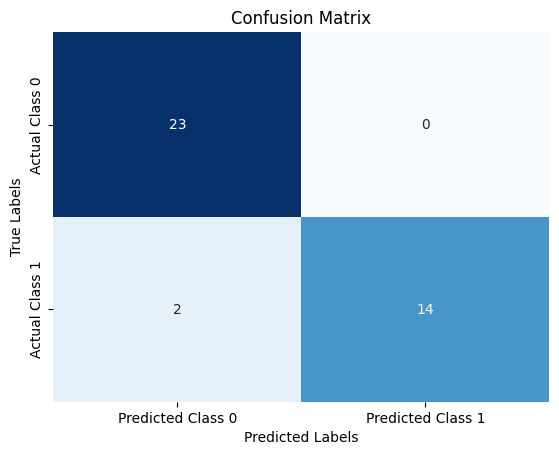


Predicted and Actual Values:

Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = CNN_model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

#create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#convert the confusion matrix to a pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Class 0', 'Actual Class 1'], columns=['Predicted Class 0', 'Predicted Class 1'])

#plot the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('')

#print the predicted class and the actual class
print('Predicted and Actual Values:')
print('')
for i in range(len(y_test)):
    print('Predicted class:', y_pred_binary[i], '\tActual class:', y_test[i])

score = CNN_model.evaluate(X_test, y_test, verbose=0)

#print test accuracy
print('\n', 'Test accuracy:', score[1])
print('\n', 'Test loss:', score[0])

# Contrast Stretching and Segmentation

In [ ]:
import zipfile

#extract the dataset from the zip file
with zipfile.ZipFile('/content/contrast_stretch_segmentation.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import os
import cv2
import numpy as np

image_dir2 = '/content/contrast_stretch_segmentation'

image_files = os.listdir(image_dir2)

#sort the image files alphabetically
image_files.sort()

#create empty arrays for images (X) and labels (y)
X = []
y = []

#load images and labels
for filename in image_files:
    image_path = os.path.join(image_dir2, filename)
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, (240, 240))
        X.append(image)
        if 'cont_stretching_segmentationN' in filename:
            y.append(0)
        elif 'cont_stretching_segmentationY' in filename:
            y.append(1)

#convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)
X = np.expand_dims(X, axis=-1)

#print the shape of the arrays
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (390, 240, 240, 3, 1)
y shape: (390,)


In [ ]:
from sklearn.utils import shuffle
#shuffle the data
X, y = shuffle(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, 0.2)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 312
number of validation examples = 39
number of test examples = 39


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D,Dropout

In [ ]:
CNN_model2= tf.keras.Sequential()

CNN_model2.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(240,240,3)))
CNN_model2.add(MaxPooling2D(pool_size=2))
CNN_model2.add(Dropout(0.45))

CNN_model2.add(Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
CNN_model2.add(MaxPooling2D(pool_size=2))
CNN_model2.add(Dropout(0.25))

CNN_model2.add(Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
CNN_model2.add(MaxPooling2D(pool_size=2))
CNN_model2.add(Dropout(0.25))

CNN_model2.add(Flatten())

CNN_model2.add(Dense(512, activation='relu'))
CNN_model2.add(Dropout(0.15))


CNN_model2.add(Dense(1, activation='sigmoid'))

CNN_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 16)      3904      
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 120, 120, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 16)      20752     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 60, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 60, 16)        0

In [ ]:
CNN_model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
CNN_model2.fit(X_train, y_train, batch_size=20, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
16/16 [==============================] - 89s 6s/step - loss: 446.9353 - acc: 0.6058 - val_loss: 0.6059 - val_acc: 0.6923
Epoch 2/30
16/16 [==============================] - 77s 5s/step - loss: 0.5685 - acc: 0.6731 - val_loss: 0.5250 - val_acc: 0.6667
Epoch 3/30
16/16 [==============================] - 80s 5s/step - loss: 0.4996 - acc: 0.7596 - val_loss: 0.4617 - val_acc: 0.8462
Epoch 4/30
16/16 [==============================] - 79s 5s/step - loss: 0.3952 - acc: 0.8141 - val_loss: 0.4108 - val_acc: 0.8462
Epoch 5/30
16/16 [==============================] - 80s 5s/step - loss: 0.3257 - acc: 0.8494 - val_loss: 0.3895 - val_acc: 0.8205
Epoch 6/30
16/16 [==============================] - 79s 5s/step - loss: 0.2572 - acc: 0.8974 - val_loss: 0.3766 - val_acc: 0.8462
Epoch 7/30
16/16 [==============================] - 79s 5s/step - loss: 0.2079 - acc: 0.9231 - val_loss: 0.3611 - val_acc: 0.8718
Epoch 8/30
16/16 [==============================] - 79s 5s/step - loss: 0.1631 - acc: 0.

2/2 [==============================] - 5s 932ms/step


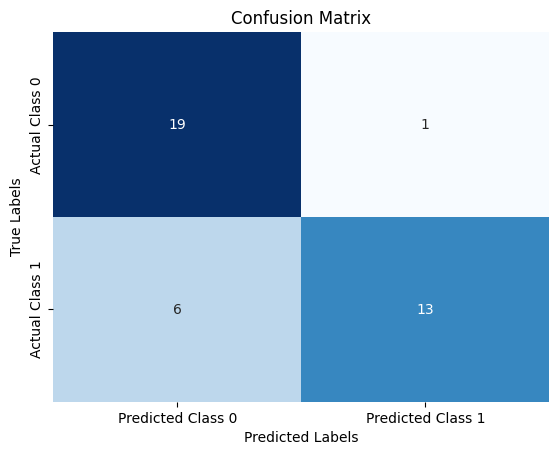


Predicted and Actual Values

Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = CNN_model2.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

#create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#convert the confusion matrix to a pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Class 0', 'Actual Class 1'], columns=['Predicted Class 0', 'Predicted Class 1'])

#plot the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('')

#[rint the predicted class and the actual class
print('Predicted and Actual Values')
print('')
for i in range(len(y_test)):
    print('Predicted class:', y_pred_binary[i], '\tActual class:', y_test[i])

score = CNN_model2.evaluate(X_test, y_test, verbose=0)

#print test accuracy
print('\n', 'Test accuracy:', score[1])
print('\n', 'Test loss:', score[0])